# Pytorch

## Importar dependencias

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

## Definir Hiperparámetros

In [2]:
input_size = 784
hidden_size = 128
num_classes = 10
num_epochs = 5
batch_size = 100
lr = 1e-3

## Descargando la base de datos mnist

In [3]:
train_data = dsets.FashionMNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.FashionMNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

## Leyendo la data

In [4]:
train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size,
                                      shuffle = False)

## Definir modelo

In [5]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.drop = nn.Dropout(0.2)
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.drop(out)
    out = self.fc2(out)
    return out

## Instancia del modelo

In [6]:
net = Net(input_size, hidden_size, num_classes)

if torch.cuda.is_available():
  net.cuda()

## Compilación

In [7]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

## Entrenamiento

In [8]:
print(torch.__version__)        # Para ver la versión de PyTorch
print(torch.cuda.is_available())

2.4.1+cpu
False


In [14]:
# Determina si hay una GPU disponible y utiliza la GPU si es posible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


net.to(device)

# Parámetros
num_epochs = 5
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Entrenamiento
for epoch in range(num_epochs):
    net.train()  #modelo en modo entrenamiento
    correct = 0
    total = 0
    running_loss = 0.0
    
    for i, (images, labels) in enumerate(train_gen):
        images = images.view(-1, 28 * 28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()  #Limpiar gradientes

        outputs = net(images)  # Forward pass
        loss = loss_function(outputs, labels)  # Calcular la pérdida
        loss.backward()  # Calcular los gradientes
        optimizer.step()  # Actualizar los parámetros

        running_loss += loss.item()  # Sumar la pérdida
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calcular y guardar pérdida y precisión de entrenamiento
    train_loss = running_loss / len(train_gen)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print('Epoca [%d/%d], Pérdida de Entrenamiento: %.4f, Precisión de Entrenamiento: %.2f%%'
          % (epoch + 1, num_epochs, train_loss, 100 * train_accuracy))

    # Evaluación
    net.eval()  # Poner el modelo en modo evaluación
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():  # No rastrear gradientes
        for images, labels in test_gen:
            images = images.view(-1, 28 * 28).to(device)
            labels = labels.to(device)

            outputs = net(images)  # Forward pass
            loss = loss_function(outputs, labels)  # Calcular la pérdida
            running_loss += loss.item()  # Sumar la pérdida

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calcular y guardar pérdida y precisión de prueba
    test_loss = running_loss / len(test_gen)
    test_accuracy = correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print('Epoca [%d/%d], Pérdida de Prueba: %.4f, Precisión de Prueba: %.2f%%'
          % (epoch + 1, num_epochs, test_loss, 100 * test_accuracy))


Epoca [1/5], Pérdida de Entrenamiento: 0.2783, Precisión de Entrenamiento: 89.64%
Epoca [1/5], Pérdida de Prueba: 0.3373, Precisión de Prueba: 87.98%
Epoca [2/5], Pérdida de Entrenamiento: 0.2698, Precisión de Entrenamiento: 90.03%
Epoca [2/5], Pérdida de Prueba: 0.3363, Precisión de Prueba: 88.08%
Epoca [3/5], Pérdida de Entrenamiento: 0.2672, Precisión de Entrenamiento: 90.02%
Epoca [3/5], Pérdida de Prueba: 0.3273, Precisión de Prueba: 88.31%
Epoca [4/5], Pérdida de Entrenamiento: 0.2624, Precisión de Entrenamiento: 90.12%
Epoca [4/5], Pérdida de Prueba: 0.3311, Precisión de Prueba: 88.49%
Epoca [5/5], Pérdida de Entrenamiento: 0.2559, Precisión de Entrenamiento: 90.50%
Epoca [5/5], Pérdida de Prueba: 0.3238, Precisión de Prueba: 88.48%


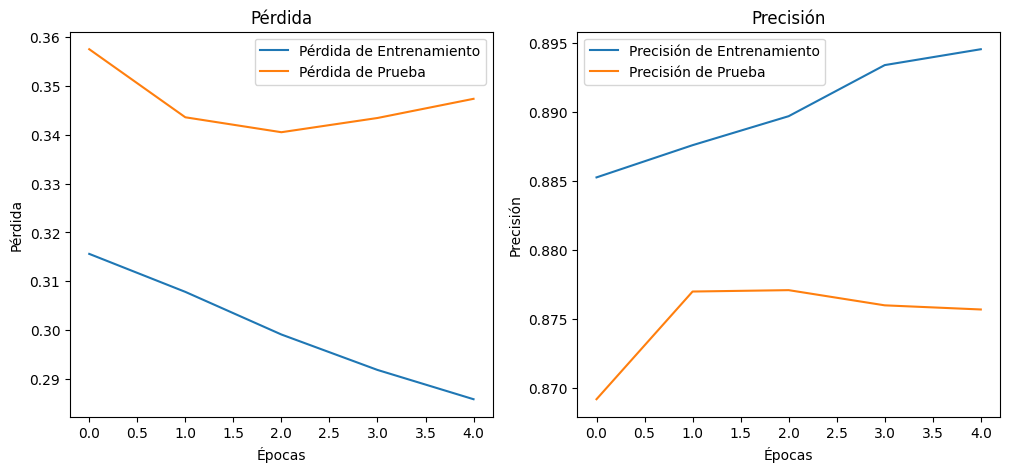

In [13]:
# Graficar Pérdida y Precisión
plt.figure(figsize=(12, 5))

# Gráfico de Pérdida
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Pérdida de Entrenamiento')
plt.plot(test_losses, label='Pérdida de Prueba')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de Precisión
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Precisión de Entrenamiento')
plt.plot(test_accuracies, label='Precisión de Prueba')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

In [11]:
correct = 0
total = 0

# Recorre el conjunto de pruebas
for images, labels in test_gen:
    # Mueve los datos a la GPU o CPU según corresponda
    images = images.view(-1, 28 * 28).to(device)  # Cambia .cuda() por .to(device)
    labels = labels.to(device)  # Cambia .cuda() por .to(device)

    output = net(images)
    _, predicted = torch.max(output, 1)
    correct += (predicted == labels).sum().item()  # Asegúrate de usar .item() para obtener un valor escalar
    total += labels.size(0)

# Imprime la precisión
print('Accuracy: %.3f %%' % (100 * correct / total))  # Cambia (total + 1) por total


Accuracy: 86.080 %
